In [2]:
%pip install scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats.mstats as mstats


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv.xls')

In [4]:
# We create a copy so that we don't modify the original dataset
df_clean = df_train.copy()
df_clean.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
# Grouped cars by "Manufacturer" and "Category" and filled missing values with the median of the group
df_clean['Levy'] = df_clean['Levy'].replace('-', np.nan)
df_clean['Levy'] = pd.to_numeric(df_clean['Levy'], errors='coerce')
df_clean['Levy'] = df_clean.groupby(['Category', 'Manufacturer'])['Levy'].transform(lambda x: x.fillna(x.median()))
df_clean['Levy'].fillna(df_clean['Levy'].median(), inplace=True)

print("Missing values in Levy after cleaning:", df_clean['Levy'].isnull().sum())




Missing values in Levy after cleaning: 0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  

In [6]:
df_clean.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,574.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
# Remove words from "Doors" column, put 5 for doors > 5, 4 for missing values
df_clean['Doors'] = df_train['Doors'].str.extract(r'(\d+)')
df_clean['Doors'] = pd.to_numeric(df_clean['Doors'], errors='coerce')

most_common_doors = df_clean['Doors'].mode()[0] 
df_clean['Doors'].fillna(most_common_doors, inplace=True)
df_clean['Doors'] = df_clean['Doors'].astype(int)

print(df_clean.info())
print(df_clean['Doors'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  float64
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int64  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

/var/folders/4k/vhzvxvxd2zd2ljmylyd3hxdr0000gn/T/ipykernel_1104/3575161047.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Doors'].fillna(most_common_doors, inplace=True)


In [8]:
# Remove "Turbo" from "Engine volume" and convert to binary
df_clean['Turbo'] = df_train['Engine volume'].astype(str).str.contains('Turbo', case=False, na=False).astype(int)
df_clean['Engine volume'] = df_train['Engine volume'].astype(str).str.extract(r'(\d+\.\d+|\d+)').astype(float)

# Convert 'Leather interior' to binary 
df_clean['Leather interior'] = df_clean['Leather interior'].astype(str).str.lower().str.strip()
df_clean['Leather interior'] = df_clean['Leather interior'].replace({'yes': 1, 'no': 0})


# Convert 'Mileage' to numeric and remove 'km'
df_clean['Mileage'] = df_clean['Mileage'].astype(str).str.replace(' km', '', regex=True)
df_clean['Mileage'] = pd.to_numeric(df_clean['Mileage'], errors='coerce')

/var/folders/4k/vhzvxvxd2zd2ljmylyd3hxdr0000gn/T/ipykernel_1104/2099556607.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Leather interior'] = df_clean['Leather interior'].replace({'yes': 1, 'no': 0})


In [9]:
df_clean.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0
2,45774419,8467,574.0,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0


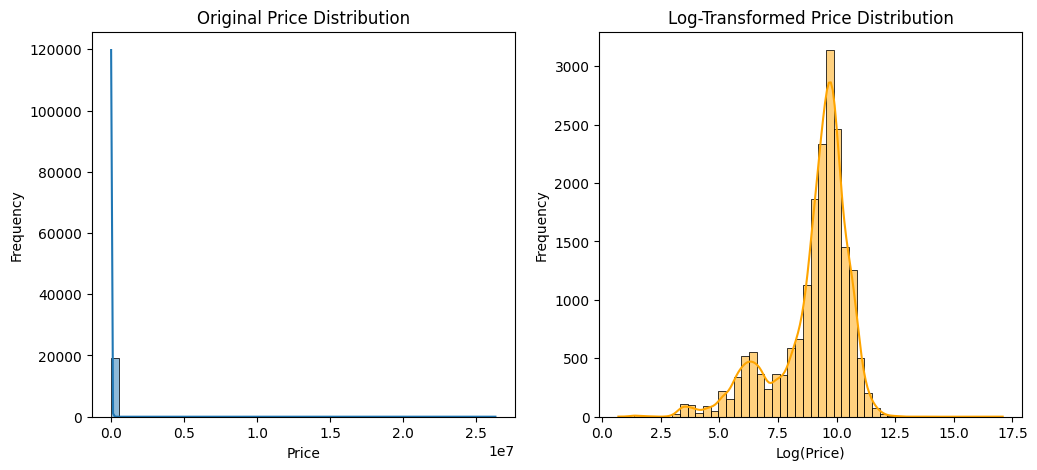

In [10]:
# Apply logarithm transformation to Price to reduce skewness
df_clean['Log_Price'] = np.log1p(df_clean['Price'])  # log1p handles log(0) cases safely

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_clean['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

sns.histplot(df_clean['Log_Price'], bins=50, kde=True, ax=axes[1], color='orange')
axes[1].set_title('Log-Transformed Price Distribution')
axes[1].set_xlabel('Log(Price)')
axes[1].set_ylabel('Frequency') 
plt.show()


On the left, the original price distribution is highly skewed, with extreme values distorting the histogram. After the log transformation, The distribution is much more normal, reducing the effect of extreme outliers. More in general, this transformation is useful for linear models, as they assume normally distributed target variables.

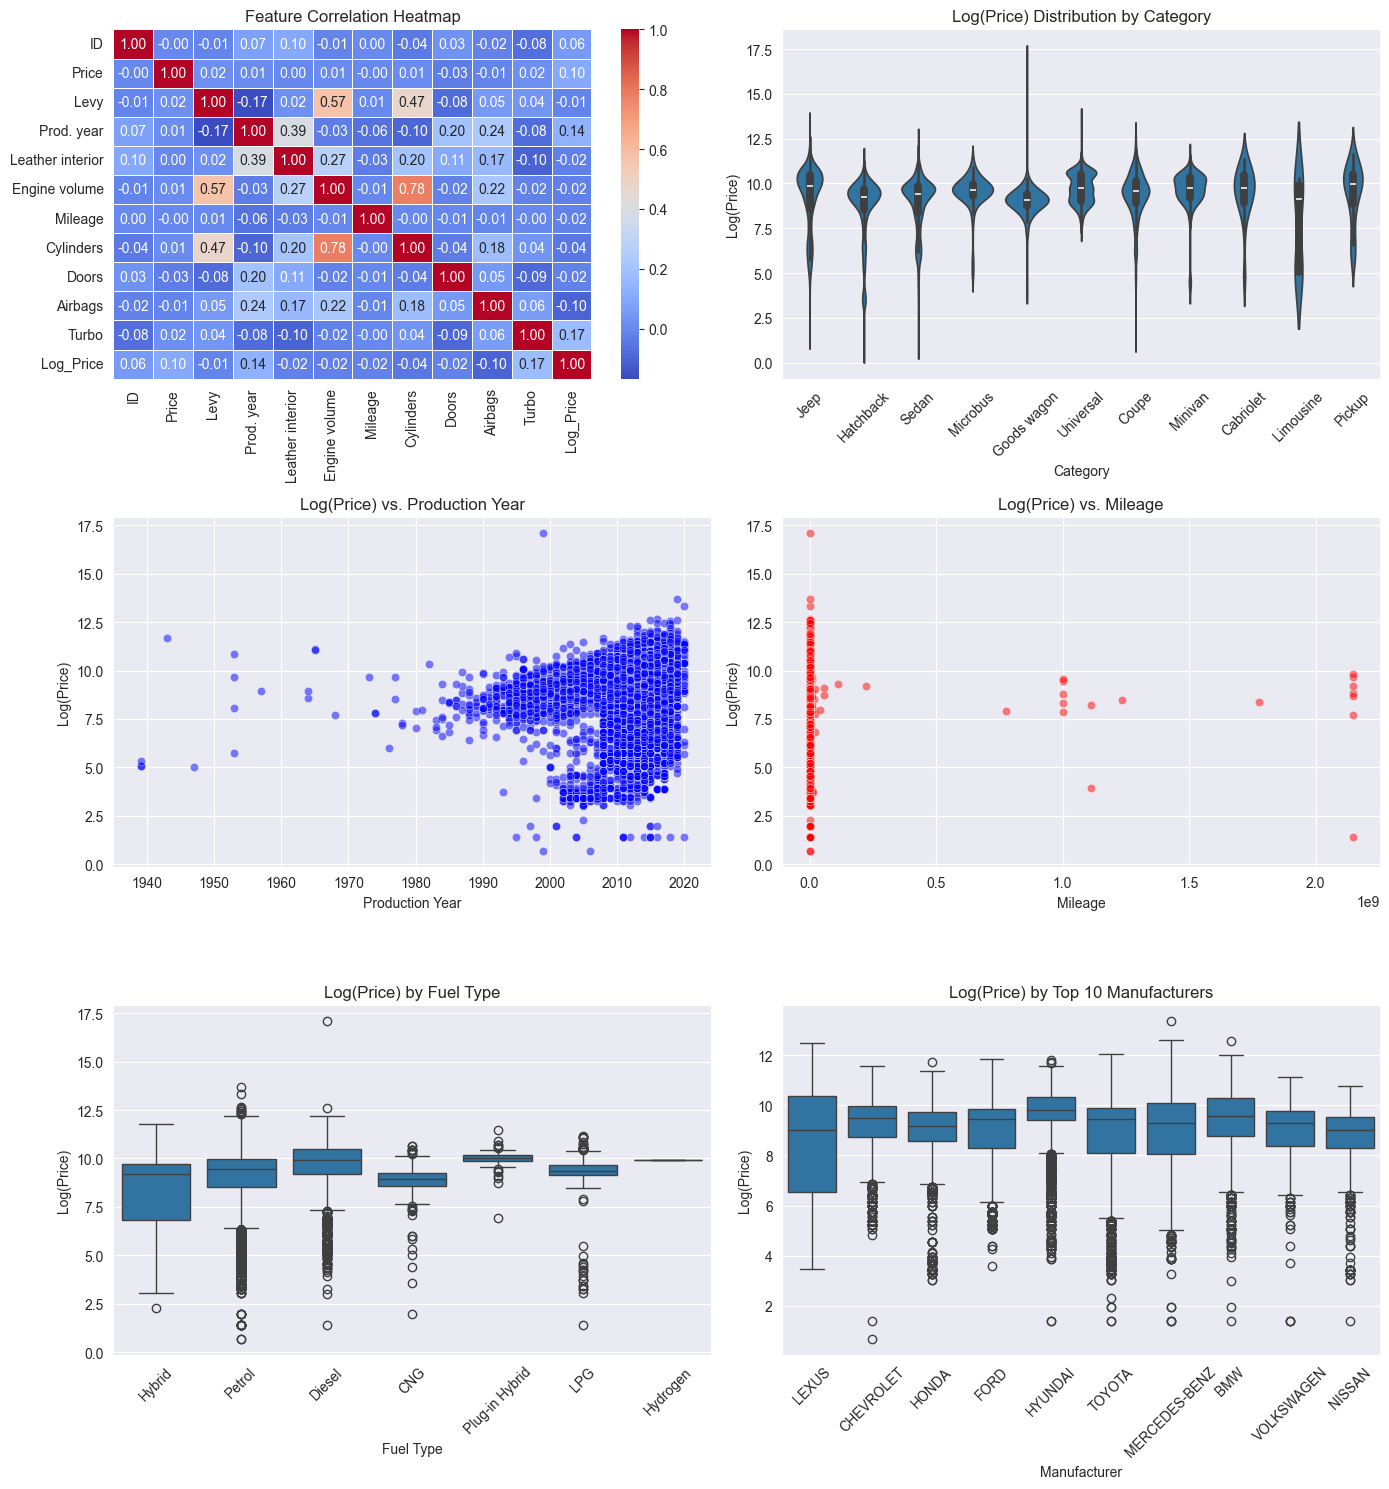

In [11]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Feature Correlation Heatmap
correlation_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Feature Correlation Heatmap")

# Plot for Log(Price) Distribution by Car Category
sns.violinplot(x=df_clean['Category'], y=df_clean['Log_Price'], ax=axes[0, 1])
axes[0, 1].set_title('Log(Price) Distribution by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Log(Price)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Price vs. Production Year 
sns.scatterplot(x=df_clean['Prod. year'], y=df_clean['Log_Price'], alpha=0.5, ax=axes[1, 0], color='b')
axes[1, 0].set_title('Log(Price) vs. Production Year')
axes[1, 0].set_xlabel('Production Year')
axes[1, 0].set_ylabel('Log(Price)')

# Price vs. Mileage
sns.scatterplot(x=df_clean['Mileage'], y=df_clean['Log_Price'], alpha=0.5, ax=axes[1, 1], color='r')
axes[1, 1].set_title('Log(Price) vs. Mileage')
axes[1, 1].set_xlabel('Mileage')
axes[1, 1].set_ylabel('Log(Price)')

# Log-Transformed Price by Fuel Type
sns.boxplot(x=df_clean['Fuel type'], y=df_clean['Log_Price'], ax=axes[2, 0])
axes[2, 0].set_title('Log(Price) by Fuel Type')
axes[2, 0].set_xlabel('Fuel Type')
axes[2, 0].set_ylabel('Log(Price)')
axes[2, 0].tick_params(axis='x', rotation=45)

# Log-Transformed Price by Top 10 Manufacturers
top_manufacturers = df_clean['Manufacturer'].value_counts().nlargest(10).index
sns.boxplot(x=df_clean[df_clean['Manufacturer'].isin(top_manufacturers)]['Manufacturer'], 
            y=df_clean[df_clean['Manufacturer'].isin(top_manufacturers)]['Log_Price'], ax=axes[2, 1])
axes[2, 1].set_title('Log(Price) by Top 10 Manufacturers')
axes[2, 1].set_xlabel('Manufacturer')
axes[2, 1].set_ylabel('Log(Price)')
axes[2, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


What is going on the Scatterplot between Log(Price) and Mileage?

# Outlier detection

Some observed relationships showed potential outliers while plotting them. Visualization helps us determine which variables' outliers should be handled and which shouldn't.

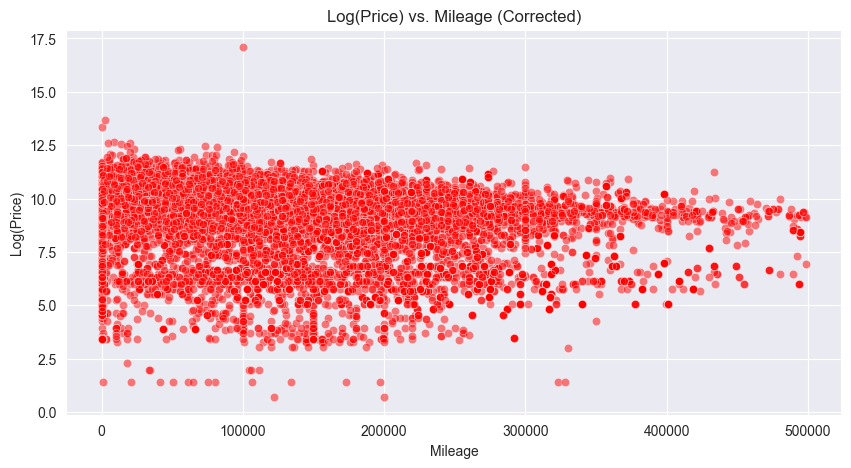

In [12]:
df_clean = df_clean[df_clean['Mileage'] < 500000]
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_clean['Mileage'], y=df_clean['Log_Price'], alpha=0.5, color='r')
plt.title('Log(Price) vs. Mileage (Corrected)')
plt.xlabel('Mileage')
plt.ylabel('Log(Price)')
plt.show()



Cars with Mileage > 500.000 (highly unlikely to be sold) are considered outliers as very few cars can be found with a Mileage over 500.000, as selling a car with such high mileage is very unlikely. As a matter of fact, the conidtion Mileage < 500.000 has been set in order to deal with eventual typos or wrong data entries in the dataset.

All the other variables were treated in such way that extreme values weren't a problem.

In [13]:
currt_time = dt.datetime.now()
df_clean['Prod. year'] = currt_time.year - df_clean['Prod. year']
df_clean.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Log_Price
0,45654403,13328,1399.0,LEXUS,RX 450,15,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0,9.497697
1,44731507,16621,1018.0,CHEVROLET,Equinox,14,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0,9.718482
2,45774419,8467,574.0,HONDA,FIT,19,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0,9.044050
3,45769185,3607,862.0,FORD,Escape,14,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0,8.190909
4,45809263,11726,446.0,HONDA,FIT,11,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0,9.369649


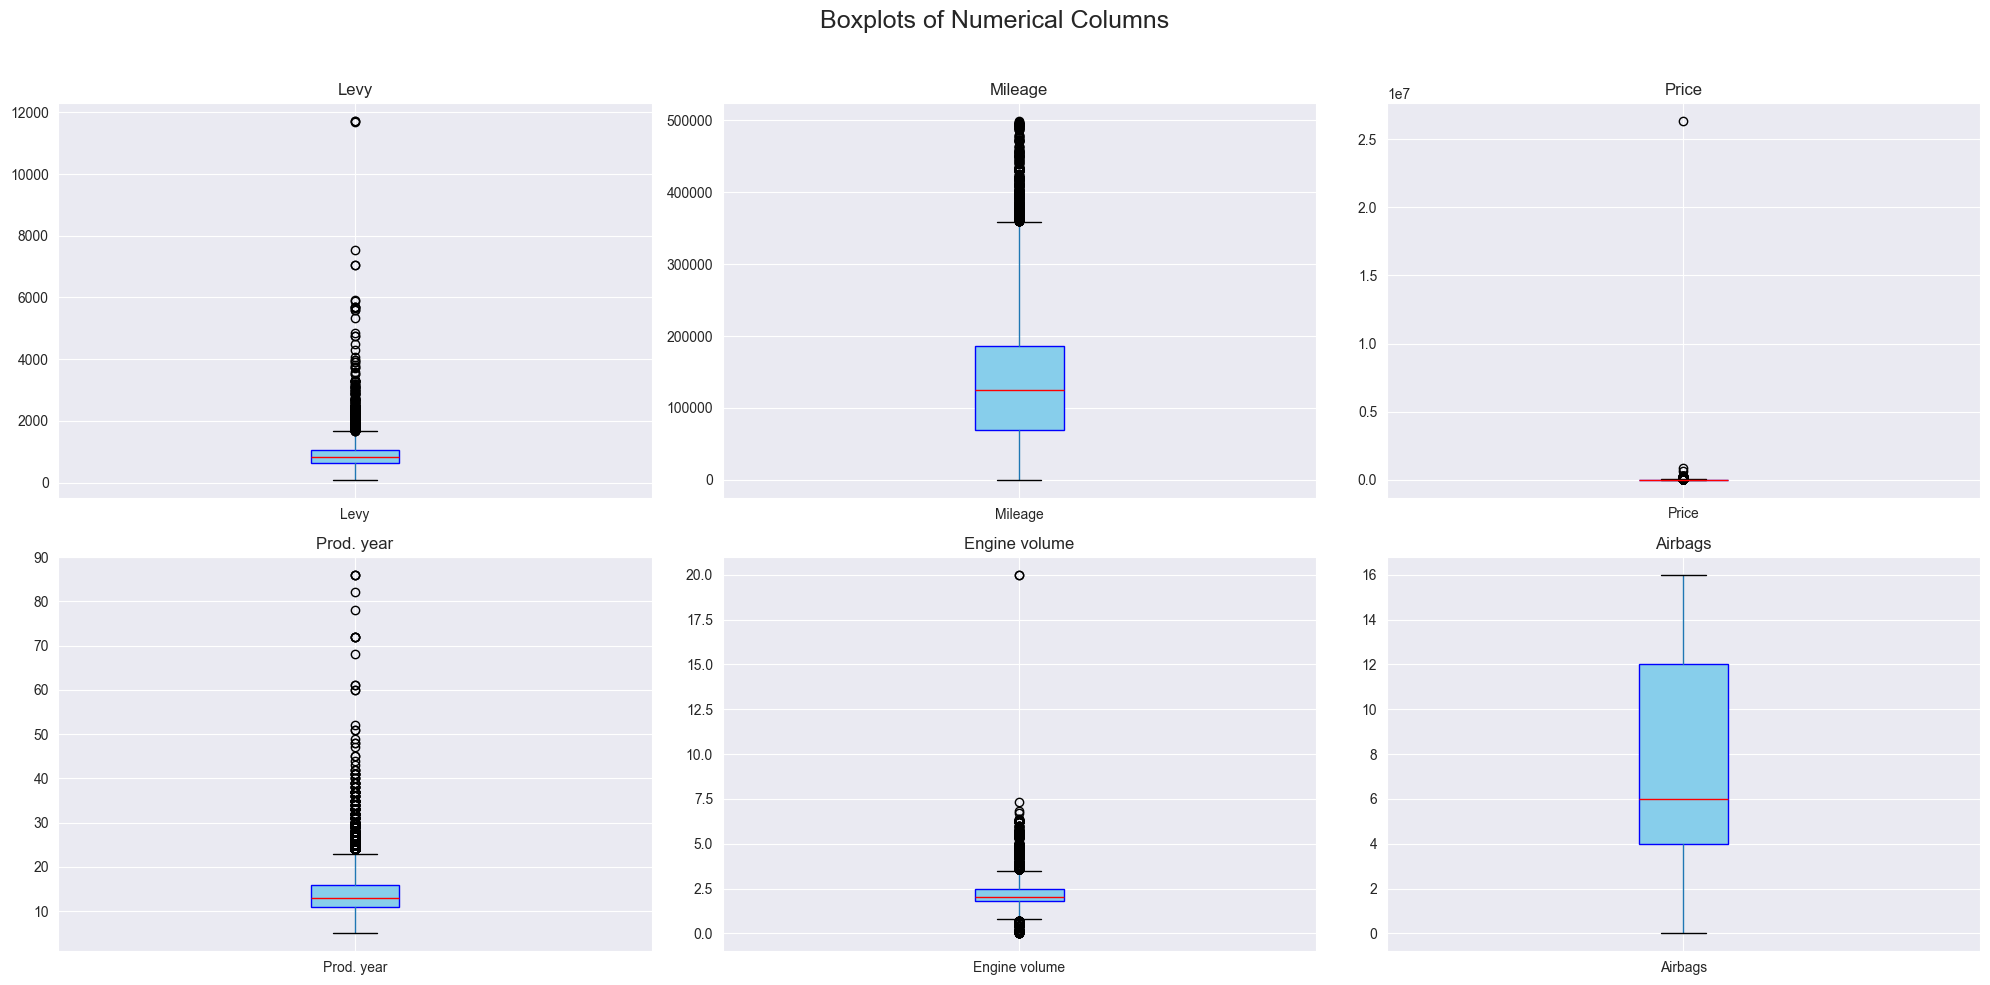

In [14]:
numerical_columns = ['Levy', 'Mileage', 'Price', 'Prod. year', 'Engine volume', 'Airbags']
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Boxplots of Numerical Columns', fontsize=18)

for ax, col in zip(axes.flatten(), numerical_columns):
    df_clean.boxplot(column=col, ax=ax, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', color='blue'),
                    medianprops=dict(color='red'))
    ax.set_title(col, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [15]:
print('5th Quantile', df_clean['Price'].quantile(0.05))
print('Min price:', df_clean['Price'].min())

print('95th Quantile:', df_clean['Price'].quantile(0.95))
print('Max price', df_clean['Price'].max())

5th Quantile 314.0
Min price: 1
95th Quantile: 49751.0
Max price 26307500


In [16]:
# Drop Price if 1000 > Price, or Price > 100000
df_clean = df_clean[(df_clean["Price"] >= 1000) & (df_clean["Price"] <= 100000)]

In [17]:
df_clean = df_clean[df_clean['Levy'] < df_clean['Price']]
df_clean = df_clean[df_clean['Engine volume'] > 0]
for col in numerical_columns[0:5]:
    df_clean.loc[:, col] = mstats.winsorize(df_clean[col], limits=[0.01, 0.04])

The `winsorize` function from `mstats` trims the top 4% and bottom 1% of data points for each of the first 5 numerical columns. This reduces the influence of extreme outliers by "capping" the extreme values to a certain threshold, improving the model's robustness by mitigating the impact of outliers.

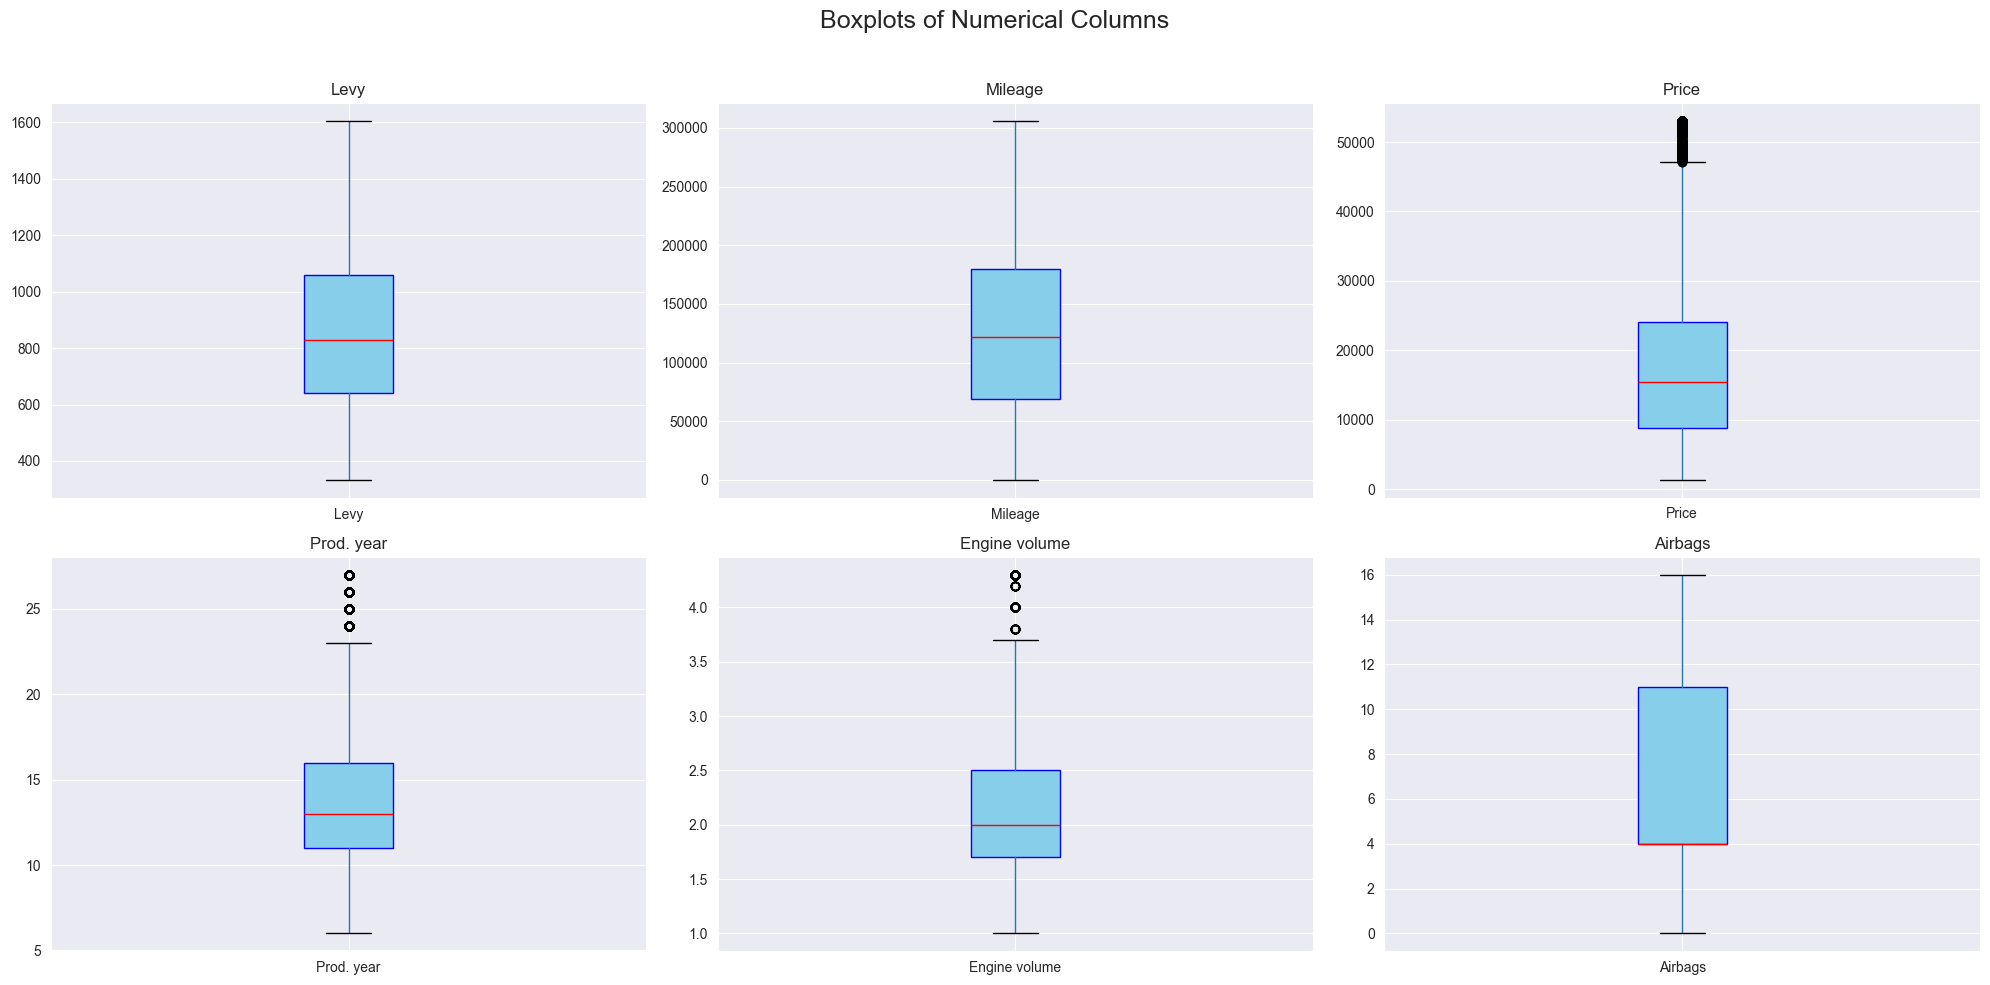

In [18]:
numerical_columns = ['Levy', 'Mileage', 'Price', 'Prod. year', 'Engine volume', 'Airbags']
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Boxplots of Numerical Columns', fontsize=18)

for ax, col in zip(axes.flatten(), numerical_columns):
    df_clean.boxplot(column=col, ax=ax, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', color='blue'),
                    medianprops=dict(color='red'))
    ax.set_title(col, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [19]:
df_clean.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Log_Price
0,45654403,13328,1399.0,LEXUS,RX 450,15,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,0,9.497697
1,44731507,16621,1018.0,CHEVROLET,Equinox,14,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,0,9.718482
2,45774419,8467,574.0,HONDA,FIT,19,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0,9.044050
3,45769185,3607,862.0,FORD,Escape,14,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,0,8.190909
4,45809263,11726,446.0,HONDA,FIT,11,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0,9.369649


# Categorical Variables Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for Categorical Features
dummies = pd.get_dummies(df_clean[['Drive wheels', 'Gear box type', 'Fuel type']], prefix=['NewDrive', 'NewGear', 'NewFuel'])

df_clean = pd.concat([df_clean, dummies], axis=1)
df_clean.drop(['Drive wheels', 'Gear box type', 'Fuel type'], axis=1, inplace=True)

# Label Encoding for Remaining Categorical Variables**
label_encoder = LabelEncoder()
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = label_encoder.fit_transform(df_clean[col])  # Convert categorical values to numeric

- Label Encoding is applied to Manufacturer and Model because they are high-cardinality (many unique values).
- One-Hot Encoding is applied to Fuel type, Gear box type, Drive wheels because they are low-cardinality (fewer unique values).


In [21]:
df_clean.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,...,NewGear_Manual,NewGear_Tiptronic,NewGear_Variator,NewFuel_CNG,NewFuel_Diesel,NewFuel_Hybrid,NewFuel_Hydrogen,NewFuel_LPG,NewFuel_Petrol,NewFuel_Plug-in Hybrid
0,45654403,13328,1399.0,30,1190,15,4,1,3.5,186005,...,False,False,False,False,False,True,False,False,False,False
1,44731507,16621,1018.0,7,635,14,4,0,3.0,192000,...,False,True,False,False,False,False,False,False,True,False
2,45774419,8467,574.0,20,660,19,3,0,1.3,200000,...,False,False,True,False,False,False,False,False,True,False
3,45769185,3607,862.0,15,638,14,4,1,2.5,168966,...,False,False,False,False,False,True,False,False,False,False
4,45809263,11726,446.0,20,660,11,3,1,1.3,91901,...,False,False,False,False,False,False,False,False,True,False


In [22]:
df_clean.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Engine volume', 'Mileage', 'Cylinders',
       'Doors', 'Wheel', 'Color', 'Airbags', 'Turbo', 'Log_Price',
       'NewDrive_4x4', 'NewDrive_Front', 'NewDrive_Rear', 'NewGear_Automatic',
       'NewGear_Manual', 'NewGear_Tiptronic', 'NewGear_Variator',
       'NewFuel_CNG', 'NewFuel_Diesel', 'NewFuel_Hybrid', 'NewFuel_Hydrogen',
       'NewFuel_LPG', 'NewFuel_Petrol', 'NewFuel_Plug-in Hybrid'],
      dtype='object')

Everything is ready for model training !

# Model Training and Testing

## Random Forest Regressor

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = df_clean.drop(columns=['Log_Price', 'Price'])  # Features (all columns except 'Log_Price')
y = df_clean['Log_Price']  # Target variable (Log-transformed price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_log = rf_model.predict(X_test)  # Predicted Log_Price

mse = mean_squared_error(y_test, y_pred_log)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_log)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}, R^2 Score: {r2:.2f}")

y_pred_price = np.expm1(y_pred_log)  # Inverse transformation to get actual prices
actual_prices = np.expm1(y_test)  # Inverse transformation of true values (Log_Price to Price)

mse_price = mean_squared_error(actual_prices, y_pred_price)
rmse_price = np.sqrt(mse_price)
r2_price = r2_score(actual_prices, y_pred_price)
print(f"Root Mean Squared Error (RMSE) on actual prices: {rmse_price:.2f}, R² Score: {r2_price:.2f}")

Root Mean Squared Error (RMSE): 0.37, R^2 Score: 0.81
Root Mean Squared Error (RMSE) on actual prices: 6806.08, R² Score: 0.80


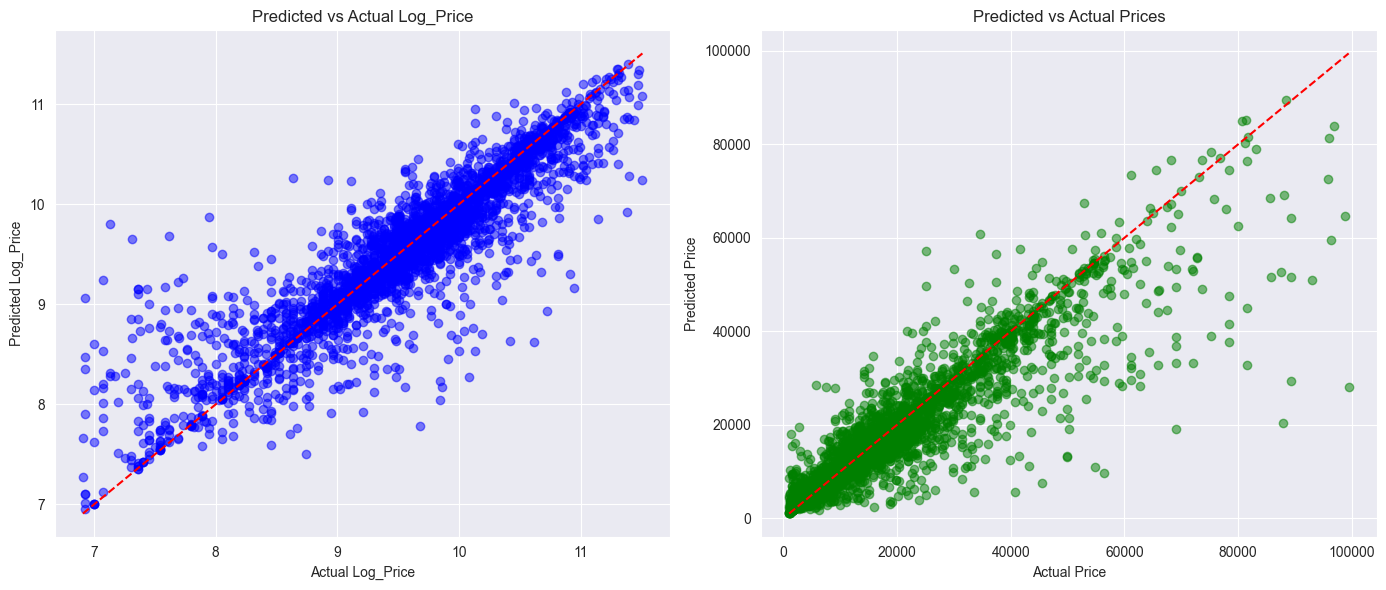

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(y_test, y_pred_log, color='blue', alpha=0.5)
axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect fit
axes[0].set_title('Predicted vs Actual Log_Price')
axes[0].set_xlabel('Actual Log_Price')
axes[0].set_ylabel('Predicted Log_Price')
axes[0].grid(True)

axes[1].scatter(actual_prices, y_pred_price, color='green', alpha=0.5)
axes[1].plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)], color='red', linestyle='--')  # Line of perfect fit
axes[1].set_title('Predicted vs Actual Prices')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## XGBoost with Hyperparameter Tuning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

xgb_model = xgb.XGBRegressor(
    random_state=42,
    objective="reg:squarederror",  # typical for regression
    n_jobs=-1                      # use all CPU cores
)

param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,                              # Number of random parameter sets
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=3,                                   # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,                              # Use all CPU cores
    random_state=42
)

random_search.fit(X_train, y_train)

# 7. Retrieve the best model and hyperparameters
best_xgb = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)
print("Best CV RMSE (negative means better):", -random_search.best_score_)

# 8. Predict on the test set
y_pred = best_xgb.predict(X_test)

# 9. Calculate RMSE and R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Best CV RMSE (negative means better): 0.4626944684120972
Test RMSE: 0.44746777515303165
Test R²: 0.7216306293767603


## Light Gradient-Boosting Machine (LGBM) with Hyperparameter Tuning

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


lgb_model = lgb.LGBMRegressor(random_state=42)


param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 63],
    'max_depth': [-1, 3, 5],        # -1 means no limit
    'min_child_samples': [20, 50],  # Minimum data in one leaf
    'subsample': [0.8, 1.0],        # Row sampling
    'colsample_bytree': [0.8, 1.0], # Feature sampling
}

random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=15,  # number of different parameter combinations to try
    scoring='neg_root_mean_squared_error',  # negative RMSE
    cv=3,       # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # use all available CPU cores
    random_state=42
)


random_search.fit(X_train, y_train)


best_lgb = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)
print("Best CV RMSE (negative means better):", -random_search.best_score_)


y_pred = best_lgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)




Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 8645, number of used features: 27
[LightGBM] [Info] Start training from score 9.545523
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points

In [ ]:
df_clean.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Engine volume,Mileage,...,NewGear_Manual,NewGear_Tiptronic,NewGear_Variator,NewFuel_CNG,NewFuel_Diesel,NewFuel_Hybrid,NewFuel_Hydrogen,NewFuel_LPG,NewFuel_Petrol,NewFuel_Plug-in Hybrid
0,45654403,13328,1399.0,30,1190,15,4,1,3.5,186005,...,False,False,False,False,False,True,False,False,False,False
1,44731507,16621,1018.0,7,635,14,4,0,3.0,192000,...,False,True,False,False,False,False,False,False,True,False
2,45774419,8467,574.0,20,660,19,3,0,1.3,200000,...,False,False,True,False,False,False,False,False,True,False
3,45769185,3607,862.0,15,638,14,4,1,2.5,168966,...,False,False,False,False,False,True,False,False,False,False
4,45809263,11726,446.0,20,660,11,3,1,1.3,91901,...,False,False,False,False,False,False,False,False,True,False


## Support Vector Machines (SVMs) with Hyperparameter Tuning

In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score



# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3. Create a Pipeline that scales data then applies SVR
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

# 4. Define a hyperparameter distribution for RandomizedSearch
param_dist = {
    "svr__kernel": ["rbf"],         # Try "linear" or "poly" if you want more variety
    "svr__C": [0.1, 1, 10, 100],
    "svr__gamma": [0.01, 0.1, 1],
    "svr__epsilon": [0.01, 0.1, 1]
}

# 5. Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=10,  # Number of random parameter sets to try
    scoring="neg_root_mean_squared_error",  # We'll optimize for RMSE
    cv=3,       # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# 6. Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# 7. Retrieve the best model and hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best Hyperparameters:", best_params)
print("Best CV RMSE (negative means better):", -random_search.best_score_)

# 8. Evaluate on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R²
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'svr__kernel': 'rbf', 'svr__gamma': 0.1, 'svr__epsilon': 0.1, 'svr__C': 1}
Best CV RMSE (negative means better): 0.4943145012502632
Test RMSE: 0.4502707092953495
Test R²: 0.7181323003383742


# Export the model

In [ ]:
'''
import pickle

best_model = xgb_best_model

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved successfully!")
'''